<a href="https://colab.research.google.com/github/Z-9000/ML-DL_with_TensorFlow/blob/main/01TensorFlow.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Linear Regression with TensorFlow

In statistical modeling, regression analysis is a set of statistical processes for estimating the relationship between a dependent variable(outcome variable) and one or more independent variable(predictors, covariates, features)

*   Architecture of a NN regression model
*   Input shapes and output shapes of a regression model (features and labels)
*   Creating custom data to view and fit
*   Steps in modelling
  1. Creating a model
  2. Compiling a model
  3. Fitting a model
  4. Evaluating a model
*   Different evaluation methods
*   Saving and loading models






In [ ]:
import tensorflow as tf
print(tf.__version__)

2.19.0


**Regression inputs and outputs**

**Anatomy of a Neural Network**

**Creating Data to View and Fit**

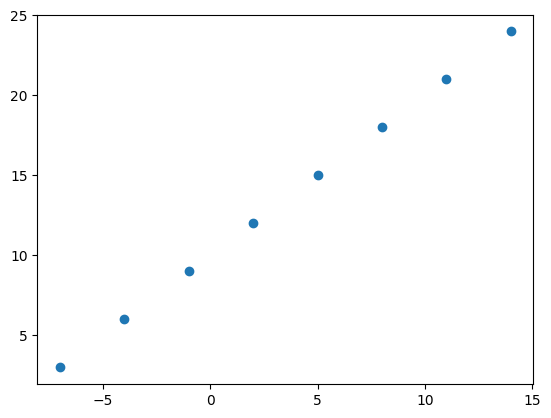

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

#Create features
X = np.array([-7.0, -4.0, -1.0, 2.0, 5.0, 8.0, 11.0, 14.0])

#Create labels
y = np.array([3.0, 6.0, 9.0, 12.0, 15.0, 18.0, 21.0, 24.0])

#Visualize it
plt.scatter(X, y);

In [ ]:
y == X + 10

array([ True,  True,  True,  True,  True,  True,  True,  True])

## Input and Output Shapes

In [ ]:
# Create a demo tensor for our housing price prediction problem
house_info = tf.constant(["bedroom", "bathroom", "garage"])
house_price = tf.constant([939700])
house_info, house_price

(<tf.Tensor: shape=(3,), dtype=string, numpy=array([b'bedroom', b'bathroom', b'garage'], dtype=object)>,
 <tf.Tensor: shape=(1,), dtype=int32, numpy=array([939700], dtype=int32)>)

In [ ]:
X[0], y[0]

(np.float64(-7.0), np.float64(3.0))

In [ ]:
input_shape = X[0].shape
output_shape = y[0].shape
input_shape, output_shape

((), ())

In [ ]:
X[0].ndim

0

In [ ]:
X = tf.cast(tf.constant(X), dtype=tf.float32)
y = tf.cast(tf.constant(y), dtype=tf.float32)
X, y

(<tf.Tensor: shape=(8,), dtype=float32, numpy=array([-7., -4., -1.,  2.,  5.,  8., 11., 14.], dtype=float32)>,
 <tf.Tensor: shape=(8,), dtype=float32, numpy=array([ 3.,  6.,  9., 12., 15., 18., 21., 24.], dtype=float32)>)

In [ ]:
input_shape = X[0].shape
output_shape = y[0].shape
input_shape, output_shape

(TensorShape([]), TensorShape([]))

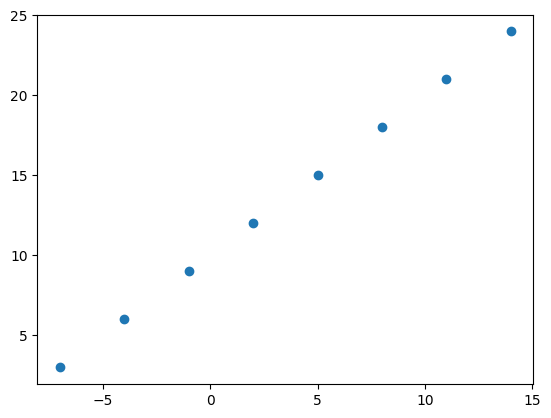

In [ ]:
plt.scatter(X, y)

Steps in modelling with TensorFlow
1. Creating a model - construct or import a  pretrained model relevant to your problem
2. Compiling a model - prepare it to be used with data
 - Loss - how wrong your model's predictions are compared to the truth labels(you want to mimize this)
 - Optimizer - how your model should update its internal patterns to better its predictions
 - Metrics - human interpretable values for how well your model is doing

*Upto this point we have only created our model and compiled, it hasn't learned anything yet*

3. Fitting a model(fit the model to the training set so it can discover patterns)
 - Epochs - how many times the model will go through all the training examples
4. Evaluate the model on the test data(how reliable are our model's predictions?)

In [ ]:
 # Building our model
tf.random.set_seed(42)
 # 1. Create the model using Sequential API
model = tf.keras.Sequential([  # Sequential
     tf.keras.layers.Dense(1)
 ])

# 2. Compile the model
model.compile(loss = tf.keras.losses.mae, # mean absolute error
              optimizer = tf.keras.optimizers.SGD(), # stochastic gradient decent
              metrics = ["mae"])

# 3. Fit the model
model.fit(tf.expand_dims(X, axis=-1), y, epochs = 5) # epochs => laps, i.e. it will run for 5 laps here in this case i.e. how many times the model will go through the training data

Epoch 1/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 426ms/step - loss: 11.7848 - mae: 11.7848
Epoch 2/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step - loss: 11.6523 - mae: 11.6523
Epoch 3/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step - loss: 11.5198 - mae: 11.5198
Epoch 4/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step - loss: 11.3873 - mae: 11.3873
Epoch 5/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step - loss: 11.2548 - mae: 11.2548


In [ ]:
# X an y
X, y

(<tf.Tensor: shape=(8,), dtype=float32, numpy=array([-7., -4., -1.,  2.,  5.,  8., 11., 14.], dtype=float32)>,
 <tf.Tensor: shape=(8,), dtype=float32, numpy=array([ 3.,  6.,  9., 12., 15., 18., 21., 24.], dtype=float32)>)

In [ ]:
y_pred = model.predict(tf.constant([[17.0]]))
y_pred

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step


array([[11.355941]], dtype=float32)

# Improving our model

We can:
- change the hyperparameters to improve it

**# Improving our model using more epochs**

In [ ]:

tf.random.set_seed(42)
 # 1. Create the model
model = tf.keras.Sequential([
     tf.keras.layers.Dense(1)
 ])

# 2. Compile the model
model.compile(loss = tf.keras.losses.mae,
              optimizer = tf.keras.optimizers.SGD(),
              metrics = ["mae"])

# 3. Fit the model
model.fit(tf.expand_dims(X, axis=-1), y, epochs = 100)

Epoch 1/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 413ms/step - loss: 10.6727 - mae: 10.6727
Epoch 2/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step - loss: 10.5402 - mae: 10.5402
Epoch 3/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step - loss: 10.4077 - mae: 10.4077
Epoch 4/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step - loss: 10.2752 - mae: 10.2752
Epoch 5/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step - loss: 10.1427 - mae: 10.1427
Epoch 6/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step - loss: 10.0102 - mae: 10.0102
Epoch 7/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step - loss: 9.8777 - mae: 9.8777
Epoch 8/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step - loss: 9.7452 - mae: 9.7452
Epoch 9/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step - loss: 9.6127 - mae: 9.6127
Epoch 10/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step - loss: 9.4802 - mae: 9.4802
Epoch 11/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step - loss: 9.3477 - mae: 9.3477
Epoch 12/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step - loss: 9.2152 - mae: 9.2152
Epoch 13/100
1/1 ━━━━━━━━━━━━━━━━━━━

In [ ]:
# X an y
X, y

(<tf.Tensor: shape=(8,), dtype=float32, numpy=array([-7., -4., -1.,  2.,  5.,  8., 11., 14.], dtype=float32)>,
 <tf.Tensor: shape=(8,), dtype=float32, numpy=array([ 3.,  6.,  9., 12., 15., 18., 21., 24.], dtype=float32)>)

In [ ]:
y_pred = model.predict(tf.constant([[17.0]]))
y_pred

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step


array([[30.017475]], dtype=float32)

**# Improving our model using more epochs and adding more hidden layers**

In [ ]:

tf.random.set_seed(42)
 # 1. Create the model
model = tf.keras.Sequential([
    tf.keras.layers.Dense(100, activation="relu"),
    tf.keras.layers.Dense(1)
 ])

# 2. Compile the model
model.compile(loss = tf.keras.losses.mae,
              optimizer = tf.keras.optimizers.SGD(),
              metrics = ["mae"])

# 3. Fit the model
model.fit(tf.expand_dims(X, axis=-1), y, epochs = 100)

Epoch 1/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 517ms/step - loss: 13.0120 - mae: 13.0120
Epoch 2/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step - loss: 12.4609 - mae: 12.4609
Epoch 3/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step - loss: 11.9199 - mae: 11.9199
Epoch 4/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step - loss: 11.3681 - mae: 11.3681
Epoch 5/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step - loss: 10.8113 - mae: 10.8113
Epoch 6/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step - loss: 10.2519 - mae: 10.2519
Epoch 7/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step - loss: 9.6743 - mae: 9.6743
Epoch 8/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step - loss: 9.1161 - mae: 9.1161
Epoch 9/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step - loss: 8.5411 - mae: 8.5411
Epoch 10/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step - loss: 7.9329 - mae: 7.9329
Epoch 11/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step - loss: 7.2833 - mae: 7.2833
Epoch 12/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step - loss: 6.5823 - mae: 6.5823
Epoch 13/100
1/1 ━━━━━━━━━━━━━━━━━━━

In [ ]:
y_pred = model.predict(tf.constant(([17.0])))
y_pred

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step


array([[32.209663]], dtype=float32)

**# Improving our model using more epochs and changing optimizer to adam**

In [ ]:

tf.random.set_seed(42)
 # 1. Create the model
model = tf.keras.Sequential([
    tf.keras.layers.Dense(1)
 ])

# 2. Compile the model
model.compile(loss = tf.keras.losses.mae,
              optimizer = tf.keras.optimizers.Adam(),
              metrics = ["mae"])

# 3. Fit the model
model.fit(tf.expand_dims(X, axis=-1), y, epochs = 100)

Epoch 1/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 596ms/step - loss: 15.7896 - mae: 15.7896
Epoch 2/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step - loss: 15.7836 - mae: 15.7836
Epoch 3/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step - loss: 15.7776 - mae: 15.7776
Epoch 4/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step - loss: 15.7716 - mae: 15.7716
Epoch 5/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step - loss: 15.7656 - mae: 15.7656
Epoch 6/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step - loss: 15.7596 - mae: 15.7596
Epoch 7/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step - loss: 15.7536 - mae: 15.7536
Epoch 8/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step - loss: 15.7476 - mae: 15.7476
Epoch 9/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step - loss: 15.7416 - mae: 15.7416
Epoch 10/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step - loss: 15.7356 - mae: 15.7356
Epoch 11/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step - loss: 15.7296 - mae: 15.7296
Epoch 12/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step - loss: 15.7236 - mae: 15.7236
Epoch 13/100
1/1 ━━━━━━━

In [ ]:
y_pred = model.predict(tf.constant(([17.0])))
y_pred

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step


array([[-8.042607]], dtype=float32)

.# Improving our model using
- more epochs
- changing optimizer to adam
- adding learning rate
- adding more hidden layers
- Setting learning_rate = 0.0001 with 100 epochs

In [ ]:

tf.random.set_seed(42)
 # 1. Create the model
model = tf.keras.Sequential([
    tf.keras.layers.Dense(100, activation="relu"),
    tf.keras.layers.Dense(100, activation="relu"),
    tf.keras.layers.Dense(100, activation="relu"),
    tf.keras.layers.Dense(1)
 ])

# 2. Compile the model
model.compile(loss = tf.keras.losses.mae,
              optimizer = tf.keras.optimizers.Adam(learning_rate=0.0001),
              metrics = ["mae"])

# 3. Fit the model
model.fit(tf.expand_dims(X, axis=-1), y, epochs = 100)

Epoch 1/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - loss: 14.0630 - mae: 14.0630
Epoch 2/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step - loss: 14.0324 - mae: 14.0324
Epoch 3/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 72ms/step - loss: 14.0019 - mae: 14.0019
Epoch 4/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 227ms/step - loss: 13.9714 - mae: 13.9714
Epoch 5/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 75ms/step - loss: 13.9410 - mae: 13.9410
Epoch 6/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 127ms/step - loss: 13.9107 - mae: 13.9107
Epoch 7/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step - loss: 13.8810 - mae: 13.8810
Epoch 8/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step - loss: 13.8513 - mae: 13.8513
Epoch 9/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step - loss: 13.8219 - mae: 13.8219
Epoch 10/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step - loss: 13.7929 - mae: 13.7929
Epoch 11/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step - loss: 13.7652 - mae: 13.7652
Epoch 12/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step - loss: 13.7380 - mae: 13.7380
Epoch 13/100
1/1 ━━━━━━━━

In [ ]:
y_pred = model.predict(tf.constant(([17.0])))
y_pred

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 73ms/step


array([[4.016641]], dtype=float32)

.# Improving our model using
- more epochs
- changing optimizer to adam
- adding learning rate
- adding more hidden layers
- Setting learning_rate = 0.001 with 100 epochs

In [ ]:

tf.random.set_seed(42)
 # 1. Create the model
model = tf.keras.Sequential([
    tf.keras.layers.Dense(100, activation="relu"),
    tf.keras.layers.Dense(100, activation="relu"),
    tf.keras.layers.Dense(100, activation="relu"),
    tf.keras.layers.Dense(1)
 ])

# 2. Compile the model
model.compile(loss = tf.keras.losses.mae,
              optimizer = tf.keras.optimizers.Adam(learning_rate=0.001),
              metrics = ["mae"])

# 3. Fit the model
model.fit(tf.expand_dims(X, axis=-1), y, epochs = 100)

Epoch 1/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step - loss: 13.0088 - mae: 13.0088
Epoch 2/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step - loss: 12.6699 - mae: 12.6699
Epoch 3/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step - loss: 12.3411 - mae: 12.3411
Epoch 4/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step - loss: 12.0148 - mae: 12.0148
Epoch 5/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 142ms/step - loss: 11.6798 - mae: 11.6798
Epoch 6/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step - loss: 11.3411 - mae: 11.3411
Epoch 7/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step - loss: 11.0110 - mae: 11.0110
Epoch 8/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 74ms/step - loss: 10.6690 - mae: 10.6690
Epoch 9/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 71ms/step - loss: 10.3037 - mae: 10.3037
Epoch 10/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 138ms/step - loss: 9.9138 - mae: 9.9138
Epoch 11/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 74ms/step - loss: 9.4994 - mae: 9.4994
Epoch 12/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 76ms/step - loss: 9.0552 - mae: 9.0552
Epoch 13/100
1/1 ━━━━━━━━━━━━━━

In [ ]:
y_pred = model.predict(tf.constant(([17.0])))
y_pred

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 71ms/step


array([[31.301907]], dtype=float32)

.# Improving our model using
- more epochs
- changing optimizer to adam
- adding learning rate
- adding more hidden layers
- Setting learning_rate = 0.01 with 100 epochs

In [ ]:

tf.random.set_seed(42)
 # 1. Create the model
model = tf.keras.Sequential([
    tf.keras.layers.Dense(100, activation="relu"),
    tf.keras.layers.Dense(100, activation="relu"),
    tf.keras.layers.Dense(100, activation="relu"),
    tf.keras.layers.Dense(1)
 ])

# 2. Compile the model
model.compile(loss = tf.keras.losses.mae,
              optimizer = tf.keras.optimizers.Adam(learning_rate=0.01),
              metrics = ["mae"])

# 3. Fit the model
model.fit(tf.expand_dims(X, axis=-1), y, epochs = 100)

Epoch 1/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - loss: 13.9333 - mae: 13.9333
Epoch 2/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step - loss: 11.2089 - mae: 11.2089
Epoch 3/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step - loss: 8.6059 - mae: 8.6059
Epoch 4/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step - loss: 4.4266 - mae: 4.4266
Epoch 5/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step - loss: 7.2733 - mae: 7.2733
Epoch 6/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step - loss: 7.8181 - mae: 7.8181
Epoch 7/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step - loss: 6.1359 - mae: 6.1359
Epoch 8/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step - loss: 4.3907 - mae: 4.3907
Epoch 9/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step - loss: 3.9956 - mae: 3.9956
Epoch 10/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step - loss: 5.5520 - mae: 5.5520
Epoch 11/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step - loss: 6.1800 - mae: 6.1800
Epoch 12/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step - loss: 5.9423 - mae: 5.9423
Epoch 13/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/s

In [ ]:
y_pred = model.predict(tf.constant(([17.0])))
y_pred

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 115ms/step


array([[27.94162]], dtype=float32)

.# Improving our model using
- more epochs
- changing optimizer to adam
- adding learning rate
- adding more hidden layers
- Setting learning_rate = 0.1 with 100 epochs

In [ ]:

tf.random.set_seed(42)
 # 1. Create the model
model = tf.keras.Sequential([
    tf.keras.layers.Dense(100, activation="relu"),
    tf.keras.layers.Dense(100, activation="relu"),
    tf.keras.layers.Dense(100, activation="relu"),
    tf.keras.layers.Dense(1)
 ])

# 2. Compile the model
model.compile(loss = tf.keras.losses.mae,
              optimizer = tf.keras.optimizers.Adam(learning_rate=0.1),
              metrics = ["mae"])

# 3. Fit the model
model.fit(tf.expand_dims(X, axis=-1), y, epochs = 100)

Epoch 1/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step - loss: 13.0301 - mae: 13.0301
Epoch 2/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step - loss: 134.8327 - mae: 134.8327
Epoch 3/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step - loss: 9.7976 - mae: 9.7976
Epoch 4/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step - loss: 12.4951 - mae: 12.4951
Epoch 5/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step - loss: 10.2975 - mae: 10.2975
Epoch 6/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step - loss: 7.8608 - mae: 7.8608
Epoch 7/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step - loss: 5.3992 - mae: 5.3992
Epoch 8/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step - loss: 6.4743 - mae: 6.4743
Epoch 9/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step - loss: 4.0264 - mae: 4.0264
Epoch 10/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step - loss: 4.1959 - mae: 4.1959
Epoch 11/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step - loss: 7.9200 - mae: 7.9200
Epoch 12/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step - loss: 3.9547 - mae: 3.9547
Epoch 13/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 

In [ ]:
y_pred = model.predict(tf.constant(([17.0])))
y_pred

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 77ms/step


array([[26.640268]], dtype=float32)

In [ ]:
 # Improving our model using more epochs and changing optimizer to adam, adding learning rate, adding more hidden layers
### Setting learning_rate = 1.0 with 100 epochs
tf.random.set_seed(42)
 # 1. Create the model
model = tf.keras.Sequential([
    tf.keras.layers.Dense(100, activation="relu"),
    tf.keras.layers.Dense(100, activation="relu"),
    tf.keras.layers.Dense(100, activation="relu"),
    tf.keras.layers.Dense(1)
 ])

# 2. Compile the model
model.compile(loss = tf.keras.losses.mae,
              optimizer = tf.keras.optimizers.Adam(learning_rate=1.0),
              metrics = ["mae"])

# 3. Fit the model
model.fit(tf.expand_dims(X, axis=-1), y, epochs = 100)

Epoch 1/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step - loss: 13.5337 - mae: 13.5337
Epoch 2/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step - loss: 288683.0625 - mae: 288683.0625
Epoch 3/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step - loss: 2331.3872 - mae: 2331.3872
Epoch 4/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step - loss: 293.5060 - mae: 293.5060
Epoch 5/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step - loss: 360.4283 - mae: 360.4283
Epoch 6/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step - loss: 3561.9280 - mae: 3561.9280
Epoch 7/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step - loss: 1943.9017 - mae: 1943.9017
Epoch 8/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step - loss: 209.3147 - mae: 209.3147
Epoch 9/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step - loss: 88.3033 - mae: 88.3033
Epoch 10/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step - loss: 40.1908 - mae: 40.1908
Epoch 11/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step - loss: 26.1976 - mae: 26.1976
Epoch 12/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step - loss: 10.4089 - mae: 10.4089
E

In [ ]:
y_pred = model.predict(tf.constant(([17.0])))
y_pred

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 82ms/step


array([[12.5374]], dtype=float32)

In [ ]:
 # Improving our model using more epochs and changing optimizer to adam, adding learning rate, adding more hidden layers
# Setting learning rate to be 0.0001 with 1000 epochs
tf.random.set_seed(42)
 # 1. Create the model
model = tf.keras.Sequential([
    tf.keras.layers.Dense(100, activation="relu"),
    tf.keras.layers.Dense(100, activation="relu"),
    tf.keras.layers.Dense(100, activation="relu"),
    tf.keras.layers.Dense(1)
 ])

# 2. Compile the model
model.compile(loss = tf.keras.losses.mae,
              optimizer = tf.keras.optimizers.Adam(learning_rate=0.0001),
              metrics = ["mae"])

# 3. Fit the model
model.fit(tf.expand_dims(X, axis=-1), y, epochs = 1000)

Epoch 1/1000
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - loss: 13.5205 - mae: 13.5205
Epoch 2/1000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step - loss: 13.4797 - mae: 13.4797
Epoch 3/1000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step - loss: 13.4391 - mae: 13.4391
Epoch 4/1000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step - loss: 13.3987 - mae: 13.3987
Epoch 5/1000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step - loss: 13.3582 - mae: 13.3582
Epoch 6/1000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step - loss: 13.3176 - mae: 13.3176
Epoch 7/1000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step - loss: 13.2769 - mae: 13.2769
Epoch 8/1000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step - loss: 13.2361 - mae: 13.2361
Epoch 9/1000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step - loss: 13.1952 - mae: 13.1952
Epoch 10/1000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step - loss: 13.1541 - mae: 13.1541
Epoch 11/1000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step - loss: 13.1130 - mae: 13.1130
Epoch 12/1000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step - loss: 13.0718 - mae: 13.0718
Epoch 13/1000
1

In [ ]:
y_pred = model.predict(tf.constant(([17.0])))
y_pred

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step


array([[29.403795]], dtype=float32)

In [ ]:
# Improving our model by just adding one more hidden layers
# Setting learning rate to be 0.0001 with 1000 epochs
tf.random.set_seed(42)
 # 1. Create the model
model = tf.keras.Sequential([
    tf.keras.layers.Dense(100, activation="relu"),
    tf.keras.layers.Dense(1)
 ])

# 2. Compile the model
model.compile(loss = tf.keras.losses.mae,
              optimizer = tf.keras.optimizers.SGD(),
              metrics = ["mae"])

# 3. Fit the model
model.fit(tf.expand_dims(X, axis=-1), y, epochs = 100)

Epoch 1/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 512ms/step - loss: 12.5191 - mae: 12.5191
Epoch 2/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step - loss: 11.9391 - mae: 11.9391
Epoch 3/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step - loss: 11.3587 - mae: 11.3587
Epoch 4/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step - loss: 10.7623 - mae: 10.7623
Epoch 5/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step - loss: 10.1484 - mae: 10.1484
Epoch 6/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step - loss: 9.5098 - mae: 9.5098
Epoch 7/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step - loss: 8.8395 - mae: 8.8395
Epoch 8/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step - loss: 8.1318 - mae: 8.1318
Epoch 9/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step - loss: 7.3769 - mae: 7.3769
Epoch 10/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step - loss: 6.6022 - mae: 6.6022
Epoch 11/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step - loss: 5.7929 - mae: 5.7929
Epoch 12/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step - loss: 4.9234 - mae: 4.9234
Epoch 13/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 

In [ ]:
y_pred = model.predict(tf.constant(([17.0])))
y_pred

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step


array([[32.94928]], dtype=float32)

Our model is overfitting in this case, i.e. it is learning the training data too well that when we ask it to predict the output of the new input then it is just comparing it with the training data which results in wrong output.
So the error that it is producing during the training is not really a valid representation of what it is training.

So the real way we evaluate our machine learning model is from the matrix that we get from data that it has never seen before.

# Evaluating a model

In [ ]:
import tensorflow as tf
import matplotlib.pyplot as plt

In [ ]:
# Make a bigger dataset
X = tf.range(-100, 100, 4)
X

<tf.Tensor: shape=(50,), dtype=int32, numpy=
array([-100,  -96,  -92,  -88,  -84,  -80,  -76,  -72,  -68,  -64,  -60,
        -56,  -52,  -48,  -44,  -40,  -36,  -32,  -28,  -24,  -20,  -16,
        -12,   -8,   -4,    0,    4,    8,   12,   16,   20,   24,   28,
         32,   36,   40,   44,   48,   52,   56,   60,   64,   68,   72,
         76,   80,   84,   88,   92,   96], dtype=int32)>

###

In [ ]:
# Make labels for the dataset
y = X + 10
y

<tf.Tensor: shape=(50,), dtype=int32, numpy=
array([-90, -86, -82, -78, -74, -70, -66, -62, -58, -54, -50, -46, -42,
       -38, -34, -30, -26, -22, -18, -14, -10,  -6,  -2,   2,   6,  10,
        14,  18,  22,  26,  30,  34,  38,  42,  46,  50,  54,  58,  62,
        66,  70,  74,  78,  82,  86,  90,  94,  98, 102, 106], dtype=int32)>

### Visualize the data

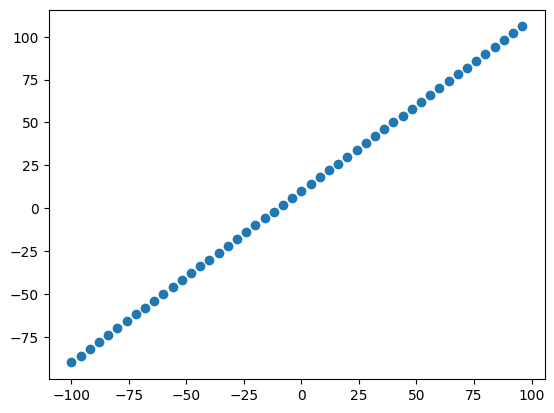

In [ ]:
#Visualize the data
plt.scatter(X, y)

### The 3 sets...
* Training set - the model learns from this data, which is typically 70-80% of the total data you have available.
* Validation set - the model gets tuned on this data, which is typically 10-15% of the data available.
* Test set - the model gets evaluated on this data to test what it has learned, this set is typically 10-15% of the data available.

In [ ]:
# Check the length of how many samples we have
len(X)

50

In [ ]:
# Split the data into train and test sets
X_train = X[:40]
y_train = y[:40]
# Skipping the validation set because our size of data is not big
X_test = X[40:]
y_test = y[40:]

len(X_train), len(X_test), len(y_train), len(y_test)

(40, 10, 40, 10)

### Visualizing the data
we have got out training and test sets do lets visualize it now

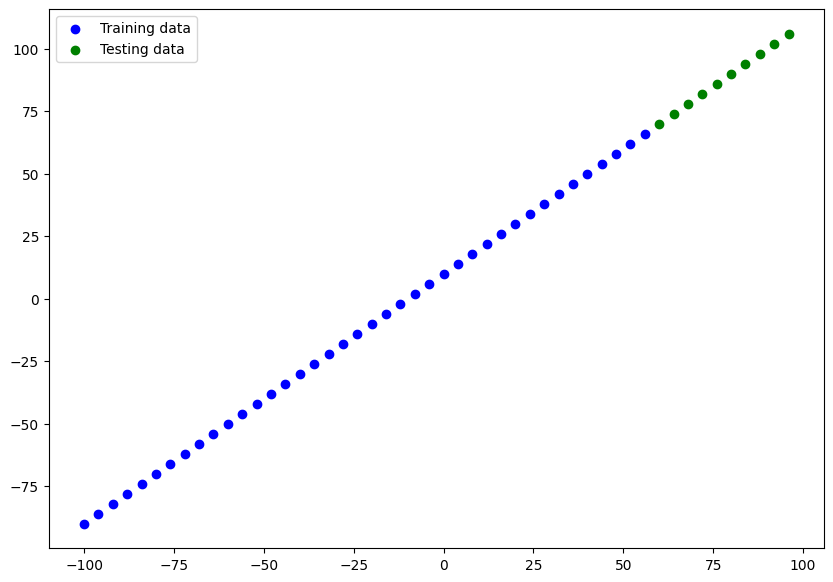

In [ ]:
plt.figure(figsize=(10,7))
# Plot training data in blue
plt.scatter(X_train, y_train, c="b", label="Training data")
# Plot test data in green
plt.scatter(X_test, y_test, c="g", label="Testing data")
# Show the legend
plt.legend();

In [ ]:
# Building a neural network for our data

# 1. Creating our model
model = tf.keras.Sequential([
    tf.keras.layers.Dense(1)
])
# 2. Compiling our model
model.compile(loss = tf.keras.losses.mae,
              optimizer = tf.keras.optimizers.SGD(),
              metrics = ["mae"])
# 3. Fitting our model
#model.fit(tf.expand_dims(X_train, axis=-1), y_train, epochs = 100)

## Visualizing the model

In [ ]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

In [ ]:
X

<tf.Tensor: shape=(50,), dtype=int32, numpy=
array([-100,  -96,  -92,  -88,  -84,  -80,  -76,  -72,  -68,  -64,  -60,
        -56,  -52,  -48,  -44,  -40,  -36,  -32,  -28,  -24,  -20,  -16,
        -12,   -8,   -4,    0,    4,    8,   12,   16,   20,   24,   28,
         32,   36,   40,   44,   48,   52,   56,   60,   64,   68,   72,
         76,   80,   84,   88,   92,   96], dtype=int32)>

In [ ]:
tf.random.set_seed(42)

# 1. Creating a model(same as above)
model = tf.keras.Sequential([
    tf.keras.layers.Dense(10, input_shape=[1], name="input_layer1"),
    tf.keras.layers.Dense(1, name="output_layer")
], name="one_of_the_many_models_we_are_going_to_build")

# 2. Compile the model(same as above)
model.compile(loss=tf.keras.losses.mae,
              optimizer=tf.keras.optimizers.SGD(),
              metrics=["mae"])

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
model.summary()

Model: "one_of_the_many_models_we_are_going_to_build"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer1 (Dense)            │ (None, 10)             │            20 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ output_layer (Dense)            │ (None, 1)              │            11 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 31 (124.00 B)

 Trainable params: 31 (124.00 B)

 Non-trainable params: 0 (0.00 B)

In [ ]:
# Lets fit our model to training data
model.fit(tf.expand_dims(X_train, axis=-1), y_train, epochs = 100, verbose = 0)

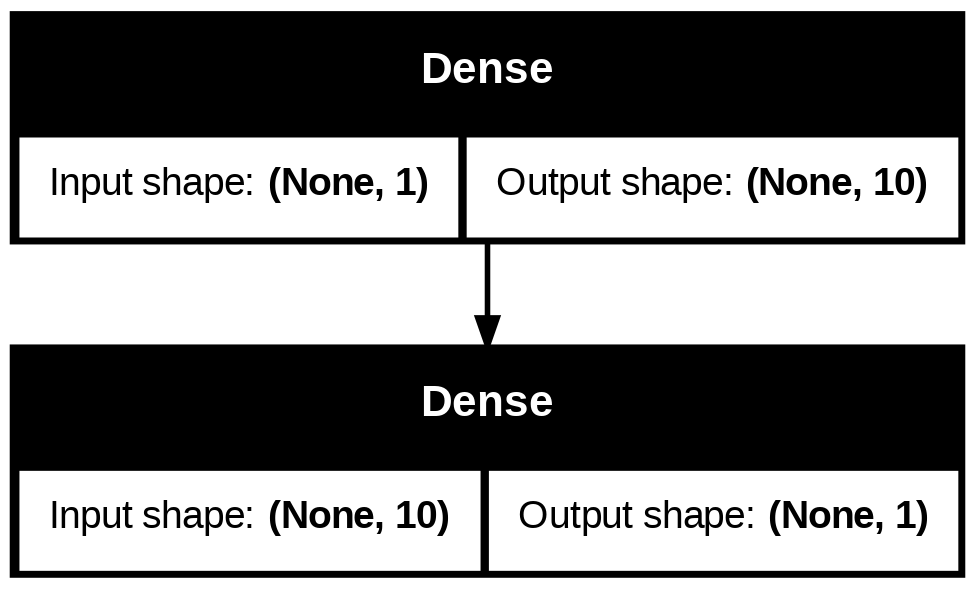

In [ ]:
from tensorflow.keras.utils import plot_model
plot_model(model=model, show_shapes=True)

### Visualizing our model's predictions

In [ ]:
# Make some predictions
y_pred = model.predict(X_test)
y_pred

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 79ms/step


array([[33.792725],
       [35.941944],
       [38.091167],
       [40.24039 ],
       [42.389606],
       [44.53883 ],
       [46.68805 ],
       [48.83727 ],
       [50.986496],
       [53.135715]], dtype=float32)

If you feel like you are going to reuse some kind of functionality in the future, it's a good idea to turn it into a function.

In [ ]:
# Let's create a plotting function
def plot_predictions(train_data=X_train,
                     train_labels=y_train,
                     test_data=X_test,
                     test_labels=y_test,
                     predictions=y_pred):
  """
  Plots training data, test data and compares predictions to ground truth labels.
  """
  plt.figure(figsize=(10,7))
  # Plot training data in blue
  plt.scatter(train_data, train_labels, c="b", label="Training data")
  # Plot testing data in green
  plt.scatter(test_data, test_labels, c="g", label="Testing data")
  # Plot model's predictions in red
  plt.scatter(test_data, predictions, c="r", label="Predictions")
  # Show the legend
  plt.legend();


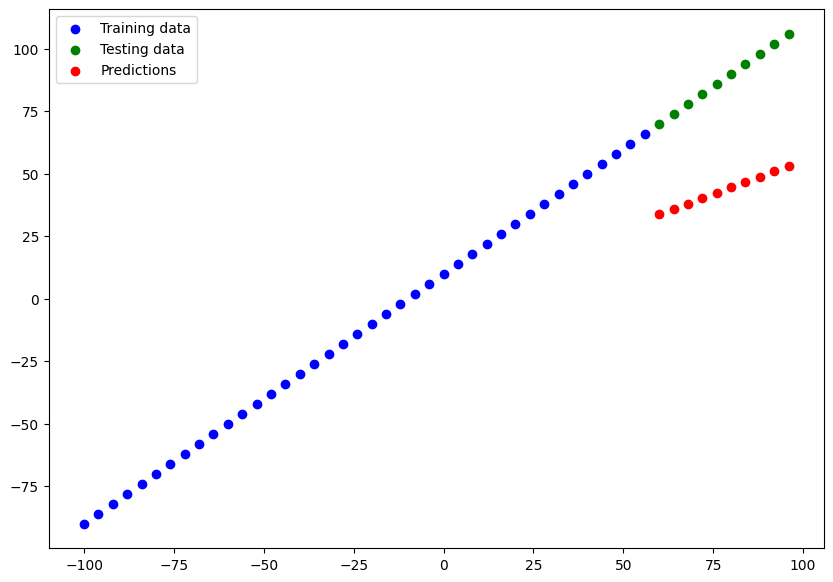

In [ ]:
plot_predictions(train_data=X_train,
                 train_labels=y_train,
                 test_data=X_test,
                 test_labels=y_test,
                 predictions=y_pred)

### Evaluating using Evaluation metrics

In [ ]:
y_pred = model.predict(X_test)
y_pred

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step


array([[33.792725],
       [35.941944],
       [38.091167],
       [40.24039 ],
       [42.389606],
       [44.53883 ],
       [46.68805 ],
       [48.83727 ],
       [50.986496],
       [53.135715]], dtype=float32)

In [ ]:
y_test

<tf.Tensor: shape=(10,), dtype=int32, numpy=array([ 70,  74,  78,  82,  86,  90,  94,  98, 102, 106], dtype=int32)>

**Evaluate method**

In [ ]:
# Evaluate the model on the test data
model.evaluate(X_test, y_test)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 170ms/step - loss: 44.5358 - mae: 44.5358


[44.5357780456543, 44.5357780456543]

**mean absolute error**

In [ ]:
# Calculate the mean absolute error
mae = tf.metrics.mae(y_true=y_test, y_pred=y_pred)
mae


<tf.Tensor: shape=(10,), dtype=float32, numpy=
array([36.207275, 38.058056, 39.908833, 41.75961 , 43.610394, 45.46117 ,
       47.31195 , 49.16273 , 51.013504, 52.864285], dtype=float32)>

The mae that we got is not the same as the one that we got from the evaluate method
- this is because the dimensions of the y_pred and y_test are not the same.
1. right now the y_pred is a numpy array
- we need to convert it into tensors
2. then we will see that the shape of the y_pred and y_test is not the same
- so we squeeze the y_pred to make the size same


In [ ]:
tf.constant(y_pred)

<tf.Tensor: shape=(10, 1), dtype=float32, numpy=
array([[33.792725],
       [35.941944],
       [38.091167],
       [40.24039 ],
       [42.389606],
       [44.53883 ],
       [46.68805 ],
       [48.83727 ],
       [50.986496],
       [53.135715]], dtype=float32)>

In [ ]:
tf.squeeze(y_pred)

<tf.Tensor: shape=(10,), dtype=float32, numpy=
array([33.792725, 35.941944, 38.091167, 40.24039 , 42.389606, 44.53883 ,
       46.68805 , 48.83727 , 50.986496, 53.135715], dtype=float32)>

In [ ]:
# now that we have y_pred and y_test of the same datatype,we can see that we get the same value of the mae as we got from evaluate
mae = tf.metrics.mae(y_true=y_test,
                     y_pred=tf.squeeze(y_pred))
mae

<tf.Tensor: shape=(), dtype=float32, numpy=44.5357780456543>

**mean square error**

In [ ]:
# Calculate the mean square error
mse = tf.metrics.mse(y_true=y_test,
                     y_pred=tf.squeeze(y_pred))
mse

<tf.Tensor: shape=(), dtype=float32, numpy=2011.695068359375>

In [ ]:
# Make some functions to reuse MAE and MSE
def mae(y_true, y_pred):
  return tf.metrics.mae(y_true=y_true,
                        y_pred=tf.squeeze(y_pred))
def mse(y_true, y_pred):
  return tf.metrics.mse(y_true=y_true,
                        y_pred=tf.squeeze(y_pred))

## Running experiments to improve our model

1. Get more data
2. Make your model larger
3. Train for longer



Let's do 3 modelling experiments:

1. `model_1` - same as the original model, 1 layer, trained for 100 epochs.
2. `model_2` - 2 layers, 100 epochs.
3. `model_3` - 2 layers, 500 epochs.

**Build model_1**

In [ ]:
# Set random seed
tf.random.set_seed(42)

# 1. Create the model
model_1 = tf.keras.Sequential([
     tf.keras.layers.Dense(1)
 ])

# 2. Compile the model
model_1.compile(loss=tf.keras.losses.mae,
                 optimizer=tf.keras.optimizers.SGD(),
                 metrics=["mae"])

# 3. Fit the model
model_1.fit(tf.expand_dims(X_train, axis=-1), y_train, epochs=100, verbose=0)

In [ ]:
y_pred_1 = model_1.predict(X_test)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 74ms/step


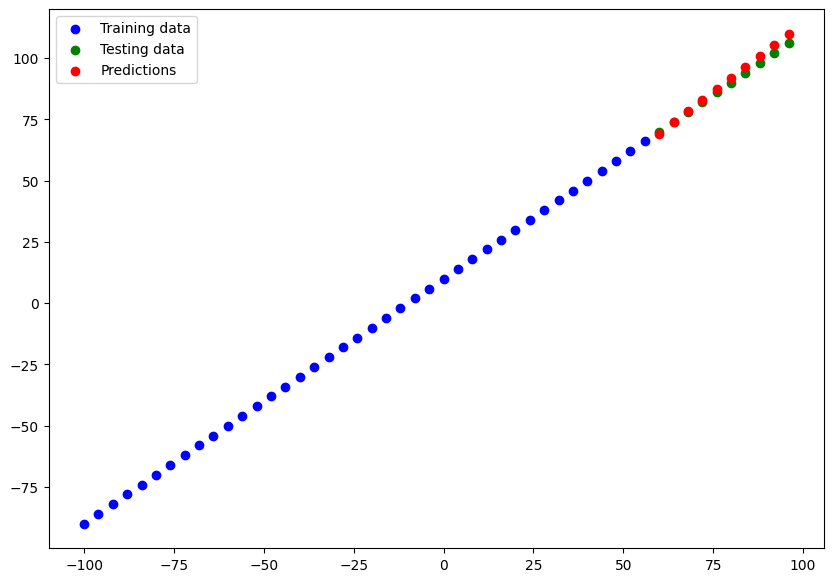

In [ ]:
plot_predictions(predictions=y_pred_1)

In [ ]:
mae_1 = mae(y_test, y_pred_1)
mse_1 = mse(y_test, y_pred_1)
mae_1, mse_1

(<tf.Tensor: shape=(), dtype=float32, numpy=1.7988135814666748>,
 <tf.Tensor: shape=(), dtype=float32, numpy=4.827309608459473>)

**Build model_2**

In [ ]:
# Set random seed
tf.random.set_seed(42)

# 1. Create the model
model_2 = tf.keras.Sequential([
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1) # Changed to 1 unit to match the output shape of y_train
])

# 2. Compile the model
model_2.compile(loss=tf.keras.losses.mae,
                optimizer=tf.keras.optimizers.SGD(),
                metrics=["mae"])

# 3. Fit the model
model_2.fit(tf.expand_dims(X_train, axis=-1), y_train, epochs=100, verbose=0)

In [ ]:
y_pred_2 = model_2.predict(X_test)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 100ms/step


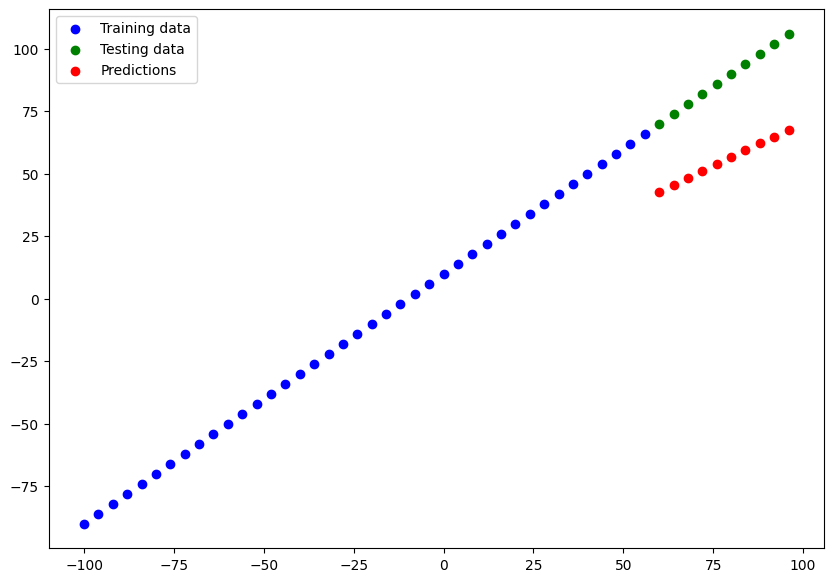

In [ ]:
plot_predictions(predictions=y_pred_2)

In [ ]:
mae_2 = mae(y_test, y_pred_2)
mse_2 = mse(y_test, y_pred_2)
mae_2, mse_2

(<tf.Tensor: shape=(), dtype=float32, numpy=32.727027893066406>,
 <tf.Tensor: shape=(), dtype=float32, numpy=1083.959716796875>)

**Build model_3**

In [ ]:
# Set random seed
tf.random.set_seed(42)

# 1. Create the  model
model_3 = tf.keras.Sequential([
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)
])

# 2. Compile the model
model_3.compile(loss=tf.keras.losses.mae,
                optimizer=tf.keras.optimizers.SGD(),
                metrics=["mae"])

# 3. Fit the model
model_3.fit(tf.expand_dims(X_train, axis=-1), y_train, epochs=500, verbose=0)

In [ ]:
y_pred=model_3.predict(X_test)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 275ms/step


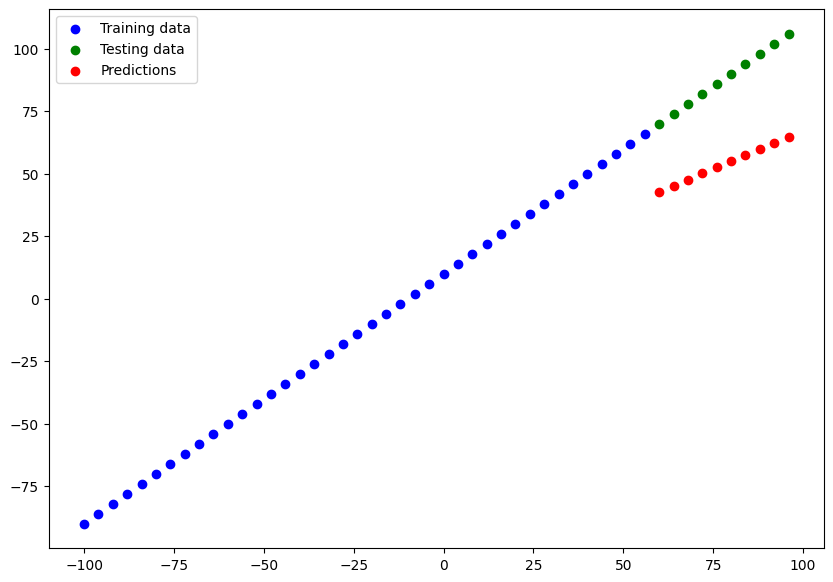

In [ ]:
plot_predictions(predictions=y_pred)

In [ ]:
mae_3 = mae(y_test, y_pred)
mse_3 = mse(y_test, y_pred)
mae_3, mse_3

(<tf.Tensor: shape=(), dtype=float32, numpy=34.228004455566406>,
 <tf.Tensor: shape=(), dtype=float32, numpy=1191.879638671875>)

## Compare the ressults of our experiments
We've run a few experiments, let's compare the results.

In [ ]:
# We are going to compare our model's results using a pandas DataFrame
import pandas as pd

model_results = [["model_1", mae_1.numpy(), mse_1.numpy()],
                 ["model_2", mae_2.numpy(), mse_2.numpy()],
                 ["model_3", mae_3.numpy(), mse_3.numpy()]]

all_results = pd.DataFrame(model_results, columns=["model", "mae", "mse"])
all_results

,model,mae,mse
0,model_1,1.798814,4.827310
1,model_2,32.727028,1083.959717
2,model_3,34.228004,1191.879639


Looks like `model_1` performed the best.

## Tracking your experiments

One really good habit in ML modelling is to track the results of your experiments.
- TensorBoard
- Weights and Biases

Saving our models

Loading in a saved model

Download a model(or any other file) from Google Colab

# A larger example

In [42]:
# Import required libraries
import tensorflow as tf
import pandas as pd
import matplotlib.pyplot as plt

In [43]:
# Read in the insurance dataset
insurance = pd.read_csv("https://raw.githubusercontent.com/stedy/Machine-Learning-with-R-datasets/refs/heads/master/insurance.csv")
insurance

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [46]:
# Let's try one-hot encode our DataFrame so it's all numbers
insurance_one_hot = pd.get_dummies(insurance)
insurance_one_hot.head()

,age,bmi,children,charges,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
0,19,27.900,0,16884.92400,True,False,False,True,False,False,False,True
1,18,33.770,1,1725.55230,False,True,True,False,False,False,True,False
2,28,33.000,3,4449.46200,False,True,True,False,False,False,True,False
3,33,22.705,0,21984.47061,False,True,True,False,False,True,False,False
4,32,28.880,0,3866.85520,False,True,True,False,False,True,False,False


In [53]:
# Create X & y values (features and labels)
X = insurance_one_hot.drop("charges", axis = 1)
y = insurance_one_hot["charges"]
X, y

(      age     bmi  children  sex_female  sex_male  smoker_no  smoker_yes  \
 0      19  27.900         0        True     False      False        True   
 1      18  33.770         1       False      True       True       False   
 2      28  33.000         3       False      True       True       False   
 3      33  22.705         0       False      True       True       False   
 4      32  28.880         0       False      True       True       False   
 ...   ...     ...       ...         ...       ...        ...         ...   
 1333   50  30.970         3       False      True       True       False   
 1334   18  31.920         0        True     False       True       False   
 1335   18  36.850         0        True     False       True       False   
 1336   21  25.800         0        True     False       True       False   
 1337   61  29.070         0        True     False      False        True   
 
       region_northeast  region_northwest  region_southeast  region_southw

In [71]:
# Creating training and test sets
#X_train = X[:936]
#y_train = y[:936]
#X_test = X[936:]
#y_test = y[936:]

# There is a better method to do this using train_test_split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
len(X), len(X_train), len(X_test)

# we don't have to reformat it into tensors,
# as pandas is built on top of numpy,
# so when we see a pandas dataframe then it is actually a numpy array
# and when we pass it to tensorflow then it knows how to deal with it

(1338, 1070, 268)

**Build insurance_model_1**

In [76]:
# Build a neural network (sort of like model_2 above)

# Set random seed
tf.random.set_seed(42)

# 1. Build our model
insurance_model_1 = tf.keras.Sequential([
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)
])

# 2. Compile our model
insurance_model_1.compile(loss=tf.keras.losses.mae,
                    optimizer=tf.keras.optimizers.SGD(),
                    metrics=["mae"])

# 3. Fit our model
insurance_model_1.fit(X_train, y_train, epochs=100)

Epoch 1/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - loss: 9959.7109 - mae: 9959.7109  
Epoch 2/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 7733.1338 - mae: 7733.1338
Epoch 3/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 7796.8613 - mae: 7796.8613
Epoch 4/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 7101.8560 - mae: 7101.8560
Epoch 5/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 7422.1699 - mae: 7422.1699
Epoch 6/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 7852.8765 - mae: 7852.8765
Epoch 7/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 7631.0234 - mae: 7631.0234
Epoch 8/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 7371.5977 - mae: 7371.5977
Epoch 9/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 7615.6255 - mae: 7615.6255
Epoch 10/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 7679.0024 - mae: 7679.0024
Epoch 11/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 7292.8970 - mae: 7292.8970
Epoch 12/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/ste

In [77]:
# Check the results of the insurance model on the test data
insurance_model_1.evaluate(X_test, y_test)

9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 6148.3496 - mae: 6148.3496  


[5940.0107421875, 5940.0107421875]

In [78]:
y_train.median(), y_train.mean()

(9575.4421, np.float64(13346.089736364485))

Right now our model is not performing very well, so lets improve our model.

To (try) improve our model, we'll run 2 experiments:
1. Add an extra layer with more hidden units and use the Adam
2. Same as above but Train for longer (200 epochs)
3. add learning rate


**Build insurance_model_2**

In [81]:
# Set random seed
tf.random.set_seed(42)

# 1. Create the model
insurance_model_2 = tf.keras.Sequential([
    tf.keras.layers.Dense(100),
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)
])

# 2. Compile the model
insurance_model_2.compile(loss=tf.keras.losses.mae,
                      optimizer=tf.keras.optimizers.Adam(),
                      metrics=["mae"])

# 3. Fit the model
insurance_model_2.fit(X_train, y_train, epochs=100)

Epoch 1/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - loss: 13277.5381 - mae: 13277.5381
Epoch 2/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 13161.9541 - mae: 13161.9541
Epoch 3/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 12929.1865 - mae: 12929.1865
Epoch 4/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 12445.5938 - mae: 12445.5938
Epoch 5/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 11564.7139 - mae: 11564.7139
Epoch 6/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 10254.5576 - mae: 10254.5576
Epoch 7/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 8809.4268 - mae: 8809.4268
Epoch 8/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 7735.2002 - mae: 7735.2002
Epoch 9/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 7435.9712 - mae: 7435.9712
Epoch 10/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 7394.4961 - mae: 7394.4961
Epoch 11/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 7373.0059 - mae: 7373.0059
Epoch 12/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 

our model was not working properly with SGD as the optimizer so we set the optimizer to Adam and it works now.

In [82]:
insurance_model_2.evaluate(X_test, y_test)

9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 5013.6167 - mae: 5013.6167  


[4866.568359375, 4866.568359375]

**Build insurance_model_3**

In [89]:
# Set random seed
tf.random.set_seed(42)

# 1. Create the model
insurance_model_3 = tf.keras.Sequential([
    tf.keras.layers.Dense(100),
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)
])

# 2. Compile the model
insurance_model_3.compile(loss=tf.keras.losses.mae,
                          optimizer=tf.keras.optimizers.Adam(),
                          metrics=["mae"])

# 3. Fit the model
# sotring in the history variable so we can
# later use the history attribute of the history to plot it later

history = insurance_model_3.fit(X_train, y_train, epochs=200)

Epoch 1/200
34/34 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 13273.3447 - mae: 13273.3447
Epoch 2/200
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 13175.3262 - mae: 13175.3262
Epoch 3/200
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 12967.8838 - mae: 12967.8838
Epoch 4/200
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 12535.0312 - mae: 12535.0312
Epoch 5/200
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 11730.2842 - mae: 11730.2842
Epoch 6/200
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 10468.2607 - mae: 10468.2607
Epoch 7/200
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 8992.0420 - mae: 8992.0420
Epoch 8/200
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 7815.6484 - mae: 7815.6484
Epoch 9/200
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 7428.2715 - mae: 7428.2715
Epoch 10/200
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 7379.7715 - mae: 7379.7715
Epoch 11/200
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 7359.3921 - mae: 7359.3921
Epoch 12/200
34/34 ━━━━━━━━━━━━━━━━━━━━ 

In [90]:
insurance_model_3.evaluate(X_test, y_test)

9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 3496.3594 - mae: 3496.3594  


[3428.626708984375, 3428.626708984375]

Text(0.5, 0, 'epochs')

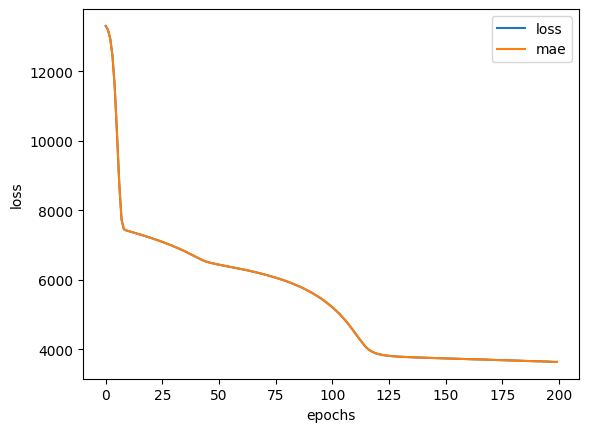

In [91]:
# Plot history (also known as a loss curve or a training curve)
pd.DataFrame(history.history).plot()
plt.ylabel("loss")
plt.xlabel("epochs")


One of the most beautiful sites in ML is a loss curve decreasing

How long should you train for?
It depends. Really... it depends on the problem you're working on. However, many people have asked this question before... so TensorFlow has a solution! It's called the [EarlyStopping Callback], which is a TensorFlow component you can add to your model to stop training once it stops improving a certain metrics.

# Feature Scaling

## Preprocessing Data (normalization and standardization)

In terms of scaling values, neural networks tend to prefer normalization.
If you're not sure which to use, you could try both and see which performs better.

Normalization - The goal of normalization is to change the value of numeric columns in the dataset to a common scale.

In [100]:
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf

# Read in the insurance dataframe
insurance = pd.read_csv("https://raw.githubusercontent.com/stedy/Machine-Learning-with-R-datasets/refs/heads/master/insurance.csv")
insurance

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


To prepare our data, we can borrow a few classes from Scikit-Learn

In [92]:
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import MinMaxScalar, OneHotEncoder
from sklearn.model_selection import train_test_split
# Create a column transformer
ct = make_column_transformer(
    (MinMaxScaler(), ["age", "bmi", "children"]), # turn all values in these columns between 0 and 1
    (OneHotEncoder(handle_unknown="ignore"), ["sex", "smoker", "region"])
)

# Create X and y
X = insurance.drop("charges", axis=1)
y = insurance["charges"]

#

,age,bmi,children,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
0,19,27.900,0,True,False,False,True,False,False,False,True
1,18,33.770,1,False,True,True,False,False,False,True,False
2,28,33.000,3,False,True,True,False,False,False,True,False
3,33,22.705,0,False,True,True,False,False,True,False,False
4,32,28.880,0,False,True,True,False,False,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...
1333,50,30.970,3,False,True,True,False,False,True,False,False
1334,18,31.920,0,True,False,True,False,True,False,False,False
1335,18,36.850,0,True,False,True,False,False,False,True,False
1336,21,25.800,0,True,False,True,False,False,False,False,True


<Axes: ylabel='Frequency'>

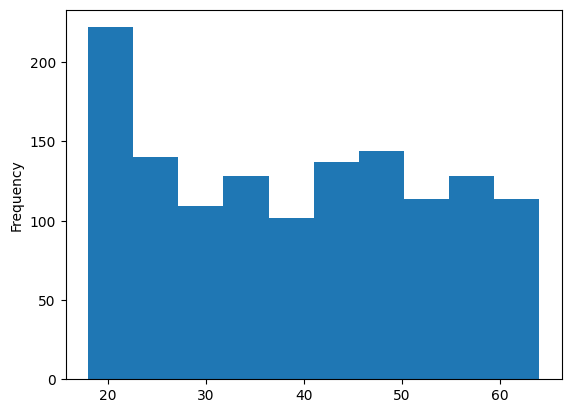

In [94]:
X["age"].plot(kind="hist")

<Axes: ylabel='Frequency'>

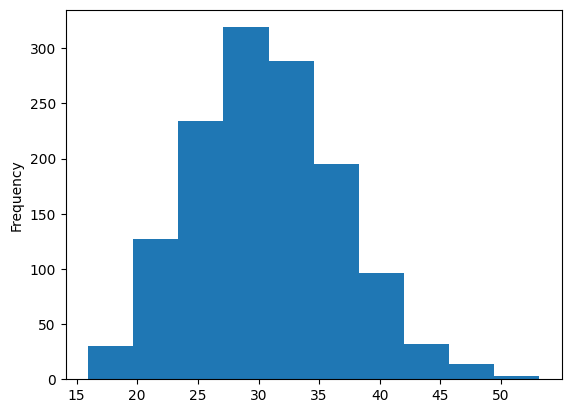

In [95]:
X["bmi"].plot(kind="hist")

In [96]:
X["children"].value_counts()

,count
children,
0,574
1,324
2,240
3,157
4,25
5,18
